In [10]:
from langgraph.graph import StateGraph, START, END
from typing import Literal
import random 
from IPython.display import Image, display 
from typing_extensions import TypedDict
from IPython.display import display, Image

In [11]:
class State(TypedDict):
    graph_state: str

In [12]:
# Will be used as conditional edge 
def decide_mood(state : State) -> Literal["happy", "sad"]:
    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:
        # 50% of the time, we return Node 2
        return "happy"
    
    # 50% of the time, we return Node 3
    return "sad"

In [13]:
def start_node(state : State) -> State:
    print("---Node 1---")
    return {"graph_state": state['graph_state'] +" I am"}

def happy_node(state : State) -> State:
    print("---Node 2---")
    return {"graph_state": state['graph_state'] +" happy!"}

def sad_node(state : State) -> State:
    print("---Node 3---")
    return {"graph_state": state['graph_state'] +" sad!"}


In [14]:
# Build graph
builder = StateGraph(State)
builder.add_node("start_node", start_node)
builder.add_node("happy", happy_node)
builder.add_node("sad", sad_node)

In [15]:
# Configure the flow of nodes
builder.add_edge(START, "start_node")
builder.add_conditional_edges("start_node", decide_mood)
builder.add_edge("happy", END)
builder.add_edge("sad", END)

In [16]:
# create graph
graph = builder.compile()

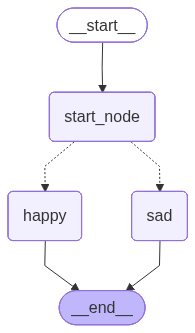

In [17]:
# Display Graph
display(Image(graph.get_graph().draw_mermaid_png(max_retries=5, retry_delay=2.0)))

In [18]:
result = graph.invoke({"graph_state" : "Hi, this is Srikanth."})
print(result)

---Node 1---
---Node 3---
{'graph_state': 'Hi, this is Srikanth. I am sad!'}
